# Machine Learning - Linear Regression Implementation Using Python

In this notebook we'll implement the the linear regression algorithm with one variable.

### Importing required packages/laibraries

In [999]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os

### Getting data ready

The dataset used in the notebook is on Kaggle : https://www.kaggle.com/andonians/random-linear-regression for randomized dataset for linear regression problem.

In [1000]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'train.txt'), delimiter=',')
X_train, X_test, y_train, y_test= train_test_split(data[:, 0], data[:, 1], test_size=0.20)

m = y_train.size  # number of training examples

#### remove missing data

In [1001]:
X_train[:5], type(X_train[0])

(array([13.394 ,  5.1077,  7.5386,  7.0931,  6.002 ]), numpy.float64)

In [1002]:
y_train[:5], type(y_train)

(array([9.0551 , 2.0576 , 3.8845 , 1.0463 , 0.92695]), numpy.ndarray)

### Understanding the data

Before going to any rask, It's useful to understand the data by visualize it, For our datasets, The more convinient plot type to use is the scatter plot since we've only to variables.

#### Definig the feauture and the target variables

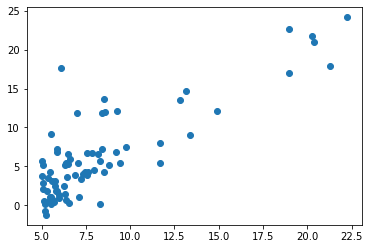

In [1003]:
plt.scatter(X_train, y_train)

Let's do some tweak to improve our plot, and create a function to deal with that insead.

In [1004]:
def plot_data(X, y):
    """
    Plot the data in a scatter plot. in the given figure with x-label and y-label axis.
    :params
    x: array-like
       data for x-axis
    y: array-like
       data for y-axis
    return NULL
    """
    
    fig = plt.figure()
    plt.plot(X, y, 'bo', ms=3, mec='k')
    plt.xlabel('x axis label')
    plt.ylabel('y axis label')


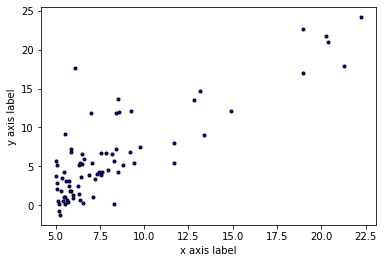

In [1005]:
plot_data(X_train, y_train)

Our hypothesis function for the problem is:  $h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}$

To best fit the our linear regression parameters $\theta_{0}$  and  $\theta_{0}$ we need to implement the **Gradient Descent** algorithm.

To do that we need to minimize our cost function :   $J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In a linear fashion the hypothesis function is given by : $h_{\theta}(x)=\theta^{T} x=\theta_{0}+\theta_{1} x_{1}$

The parameters of our model are $\theta_{j}$ values, And this values that we've to adjust to minimize the cost function discussed above... To do so we need the gradient descent algorithm.

But before implementing the Gradient Descent algorithm, we need to monitor the convergence of the alogrithm by computing the cost function at each iteration of the gradient descent algorithm.

Adding feature of ones to accomodate the $\theta_{0}$ 

In [1006]:
X_train = np.stack([np.ones(len(X_train)), X_train], axis=1)

In [1007]:
X_train[:5], y_train[:5]

(array([[ 1.    , 13.394 ],
        [ 1.    ,  5.1077],
        [ 1.    ,  7.5386],
        [ 1.    ,  7.0931],
        [ 1.    ,  6.002 ]]),
 array([9.0551 , 2.0576 , 3.8845 , 1.0463 , 0.92695]))

#### Cost function implementation  $J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In [1008]:
X_train[:5], type(X_train)

(array([[ 1.    , 13.394 ],
        [ 1.    ,  5.1077],
        [ 1.    ,  7.5386],
        [ 1.    ,  7.0931],
        [ 1.    ,  6.002 ]]),
 numpy.ndarray)

In [1009]:
y_train[:5], type(y_train)

(array([9.0551 , 2.0576 , 3.8845 , 1.0463 , 0.92695]), numpy.ndarray)

In [1010]:
def cost_function(X, y, theta):
    """
    Compute the cost function.
    return
    ------
    The value of the cost function.
    """
    # number of training samples
    m = y.size
    h_of_x = np.dot(X, theta)
#     return (1/(2 * m)) * np.sum(np.square(h_of_x - y))
    return (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

In [1011]:
J = cost_function(X_train, y_train, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = cost_function(X_train, y_train, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 35.77
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 53.48
Expected cost value (approximately) 54.24


Let's find out the theta parameter that fits better our lineare regression model by using Gradient descent


$$
\begin{aligned}
\theta_{0} &:=\theta_{0}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \\
\theta_{1} &:=\theta_{1}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \cdot x^{(i)}
\end{aligned}
$$

$And~more~generally~:~\displaystyle \theta_j := \theta_j - \frac{1}{m} \alpha \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j$

In [1012]:
def gradient_descent(X, y, theta, alpha, n_iters):
    """
    Performe Gradient descent algorithm for learning theta that fits better our linear regeression 
    algorithm by minimizing the cost function after each iteration `n_iters with the learning rate `alpha
    :params
    :X array_like 
        The design matrix of our data.
    :y array_like
        array of target attributes
    :theta : array_like
        Lineare regression parameters.
    :alpha: float
        The learning rate of the algorithm.
    :n_iters: Int
        number of iterations to perform.
        
    returns:
    --------
    theta : array_like
        The learned theta matrix that minimize the cost function.
    """

    m = y.shape[0]
    theta = theta.copy()
    
    for i in range(n_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
    
    return theta

In [1013]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1000
alpha = 0.01

theta = gradient_descent(X_train ,y_train, theta, alpha, iterations)
theta

array([-2.9974661 ,  1.12904941])

##### We found that $\theta = (-3.34635963,  1.1364949)$

Hense our hypothesis function is :
    $$
    h_{\theta}(x)=\theta^{T} x=\theta_{0}+\theta_{1} x_{1}\\
    h_{\theta}(x)= −3.34635963+ 1.1364949 * x_{1}
    $$

In [1014]:
theta_optimal = theta

In [1015]:
cost_function(X_train, y_train, theta_optimal)

5.042498641546733

Let's plot the stright line thet fits our data

In [1016]:
def plot_linear_fit(X, y_true, theta):
    """
    Plot the training data and the lineare fit on the same figure.
    :params
    :X array-like
        The design matrix.
    :y_true array-like
        The true label value.
    : theta array-like
        The optimal theta array found after running gradient descent algorithm.
    return Null
    """

    predicted_y = np.dot(X, theta)
    plot_data(X[:, 1], y_true)
    plt.plot(X[:, 1], predicted_y, '-')
    plt.legend(['ourn training data', 'lineare regression fit']);

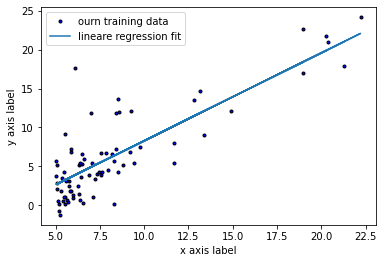

In [1017]:
plot_linear_fit(X_train, y_train, theta_optimal)

### Let's now use the built-in linear regression algorithme on Scikit-Learn library

In [1018]:
from sklearn.linear_model import LinearRegression

In [1019]:
X_train, X_test, y_train, y_test= train_test_split(data[:, 0], data[:, 1], test_size=0.20)
regressor = LinearRegression()

In [1020]:
len(X_train), len(X_test), len(y_train), len(y_test)

(77, 20, 77, 20)

In [1021]:
y_test

array([ 0.61705,  6.5987 ,  6.5426 ,  4.9981 ,  0.20421,  1.2784 ,
        5.7442 ,  5.3893 ,  0.56077,  6.7981 , -0.74279, -1.22   ,
        4.0259 ,  2.8214 , 15.505  , 24.147  , 22.638  , 11.854  ,
       -2.6807 ,  2.4756 ])

In [1022]:
X_train = X_train.reshape(-1, 1)
regressor.fit(X_train, y_train)

LinearRegression()

In [1023]:
X_test = X_test.reshape(-1, 1)
y_preds = regressor.predict(X_test)
y_preds 

array([ 2.93251059,  4.05870521,  5.91000903,  5.25745368,  2.66580006,
        3.54352993,  6.0001647 ,  4.68614576,  2.60322773,  6.95012644,
        2.65603319,  2.73449009,  4.96917018,  2.5273467 , 12.2991484 ,
       20.92726099, 17.4305088 ,  4.61359191,  2.49246504,  3.83116946])

In [1024]:
y_test

array([ 0.61705,  6.5987 ,  6.5426 ,  4.9981 ,  0.20421,  1.2784 ,
        5.7442 ,  5.3893 ,  0.56077,  6.7981 , -0.74279, -1.22   ,
        4.0259 ,  2.8214 , 15.505  , 24.147  , 22.638  , 11.854  ,
       -2.6807 ,  2.4756 ])

In [1025]:
# The coefficients of the model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [1.07328182]


#### Evaluating the model

In [1026]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1027]:
# Mean squred error
MSE = mean_squared_error(y_test, y_preds)

In [1028]:
MSE

9.258819764095433

In [1029]:
# Coefficient of determination
r2 = r2_score(y_test, y_preds)
r2

0.8231362472604677

In [1035]:
# Plot outputs
plot_data(X_test, y_test,  color='blue')
plt.plot(X_test, y_preds, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

TypeError: plot_data() got an unexpected keyword argument 'color'